# Análise dos Microdados do Enem 2021

## Compreensão do contexto do projeto

### Dados disponíveis no site: dados.gov.br/enem (é necessário escolher qual o ano que deseja analisar.)

- O projeto tem alguns desafios, como:

1.  Tamanho do dataset, mais de 2 milhões de linhas e mais de 70 colunas
2.  Tirar algumas informações sobre carateristicas dos candidatos do ensino médio.
3.   Observar se questões sociais tem influencia no conjunto de dados como localidade, sexo, estado civil, cor da pele.
4.   Extrair informações confiaveis, isso necessita de uma boa limpeza e manipulação dos dados.






## Planejamento e coleta dos dados e informações necessárias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
microdados = pd.read_csv('/content/drive/MyDrive/analise_dados/Dados_Enem/DADOS/MICRODADOS_ENEM_2021.csv', sep = ';', encoding = 'ISO-8859-1')

In [3]:
microdados.shape

(2685053, 76)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [6]:
colunas_selecionadas = ['TP_FAIXA_ETARIA','TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

In [7]:
df = microdados.filter(items = colunas_selecionadas)

## Conhecendo o conjunto de dados

In [28]:
# Distribuição média por genero 
sexo = df['TP_SEXO'].value_counts().head()/df.TP_SEXO.shape[0]*100
sexo

F    62.794217
M    37.205783
Name: TP_SEXO, dtype: float64

In [37]:
df_red = df[['NU_NOTA_REDACAO','TP_SEXO']]
df_red.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1284798.0  633.999493  188.313942  0.0  540.0  620.0  760.0   
M              756975.0  606.498471  192.433705  0.0  520.0  600.0  720.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

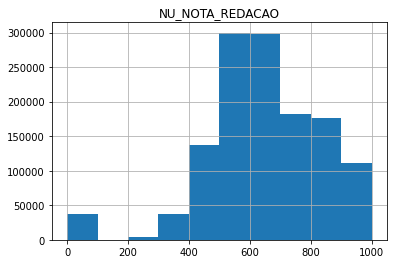

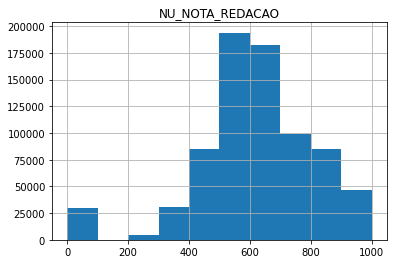

In [38]:
df_red.groupby('TP_SEXO').hist()

In [9]:
print('5 Maiores\n')

print(df['NO_MUNICIPIO_ESC'].value_counts().head())
print('**********************')
print('5 Menores\n')
print(df['NO_MUNICIPIO_ESC'].value_counts().tail())

5 Maiores

São Paulo         32884
Fortaleza         27232
Rio de Janeiro    21793
Brasília          14763
Manaus            14603
Name: NO_MUNICIPIO_ESC, dtype: int64
**********************
5 Menores

Nova Aliança do Ivaí    1
Goiabeira               1
Cedro do Abaeté         1
Marajá do Sena          1
Inúbia Paulista         1
Name: NO_MUNICIPIO_ESC, dtype: int64
